# Time Distributed LSTM

It is used for ```sequence to sequence``` model. You need equal size of input and output shape.

In [109]:
import random as random
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
def get_sequence(length):
    freq = 5
    noise = [random.uniform(-0.3,0.3) for i in range(length)]
    sequence = [np.sin(2 * np.pi * freq * (i/length)) for i in range(length)]
    signal = np.array(noise) + np.array(sequence)
    return signal

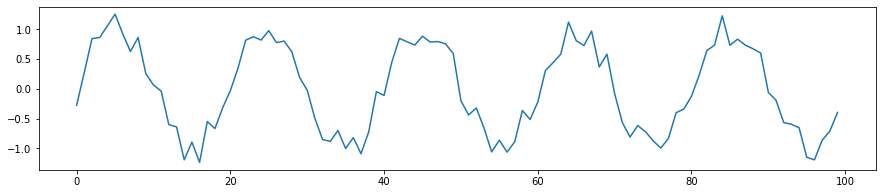

In [111]:
# Plot sequence
sequence = get_sequence(100)
plt.figure(figsize = [15,3])
plt.plot(sequence)
plt.show()


In [148]:
def generate_examples(length, n_samples, output):
    
    X, y = list(), list()
    
    for k in range(n_samples):
        
        sequence1 = get_sequence(length)
        sequence2 = get_sequence(output)
        
        # input output both will have same size
        X.append(sequence1)
        y.append(sequence2)
        
    X = np.array(X).reshape(n_samples, length, 1)
    y = np.array(y).reshape(n_samples, output, 1)
    
    return X, y

In [149]:
X,y = generate_examples(length=100, n_samples=50, output=100)

In [150]:
X.shape, y.shape

((50, 100, 1), (50, 100, 1))

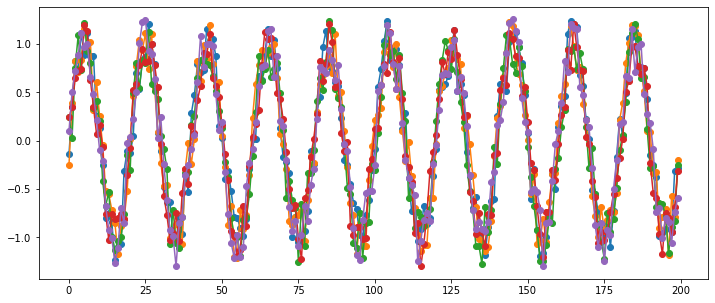

In [152]:
plt.figure(figsize =(12,5))
X, y = generate_examples(100, 5,100)
for i in range(len(X)):
    plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
plt.show() 

### Model

In [153]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM,TimeDistributed,Dense

In [211]:
# configure problem
sequence_length = 100
cell_unit = 50
output_length = 100

In [212]:
# define model
model = Sequential(name ='stacked-lstm')

model.add(LSTM(50,return_sequences=True,\
               input_shape=(sequence_length, 1),\
               name='input-layer'))

model.add(LSTM(50,return_sequences=True,\
               name = 'hidden-layer-1'))


model.add(TimeDistributed(Dense(output_length)))


# compile
model.compile(loss='mean_squared_error',\
              optimizer='rmsprop',\
              metrics='accuracy')


print(model.summary())

Model: "stacked-lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (LSTM)          (None, 100, 50)           10400     
                                                                 
 hidden-layer-1 (LSTM)       (None, 100, 50)           20200     
                                                                 
 time_distributed_18 (TimeDi  (None, 100, 100)         5100      
 stributed)                                                      
                                                                 
Total params: 35,700
Trainable params: 35,700
Non-trainable params: 0
_________________________________________________________________
None


In [213]:
#First Layer
n = 1 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

480


In [214]:
#Middle Layer
n = 10 #input vetor x
m = 10 # unit in LSTM
g = 4 # no of neuron layers inside LSTM total 4
parameters = g*(n+m+1)*m
print(parameters)

840


In [215]:
#Dense Layer
n = 10 #input vetor x
m = 25 # output vector size also equal to number of bias

parameters = n*m + m
print(parameters)

275


Note that output of last LSTM is considerd for dense layer

### Train the Model

In [216]:
sequence_length = 100
output_length = 100

In [217]:
X, y = generate_examples(sequence_length, 1000, output_length)
XX,yy = generate_examples(sequence_length, 200, output_length)

In [218]:
X.shape, y.shape

((1000, 100, 1), (1000, 100, 1))

In [219]:
history=model.fit(X, y,\
                  batch_size=10,\
                  validation_data = (XX,yy),\
                  epochs=5)

Epoch 1/5
100/100 [==============================] - 9s 68ms/step - loss: 0.1286 - accuracy: 0.0000e+00 - val_loss: 0.0439 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0395 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0365 - accuracy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0353 - accuracy: 0.0000e+00 - val_loss: 0.0331 - val_accuracy: 0.0000e+00
Epoch 5/5
100/100 [==============================] - 6s 60ms/step - loss: 0.0346 - accuracy: 0.0000e+00 - val_loss: 0.0328 - val_accuracy: 0.0000e+00


In [220]:
print(history.history)

{'loss': [0.1286030262708664, 0.03951394557952881, 0.0364912711083889, 0.03529560565948486, 0.03456797078251839], 'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [0.043893393129110336, 0.049545206129550934, 0.03237476944923401, 0.033146440982818604, 0.03281331807374954], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0]}


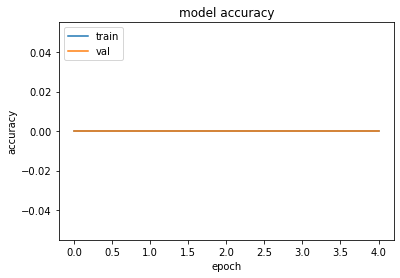

In [221]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

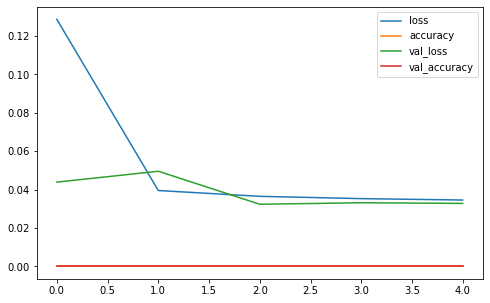

In [222]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Test the model

In [223]:
X, y = generate_examples(sequence_length, 100, output_length) 
loss = model.evaluate(X, y, verbose=0)
loss

[0.03316580131649971, 0.0]

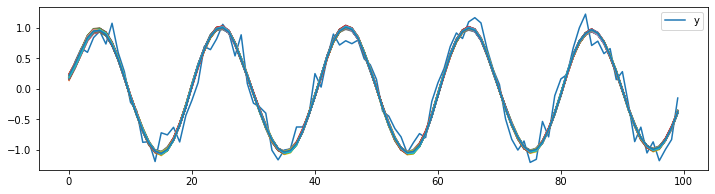

In [225]:
# prediction on new data
X, y = generate_examples(sequence_length, 1, output_length) 
yhat = model.predict(X, verbose=0)

plt.figure(figsize = [12,3])
plt.plot(y[0], label='y') 
plt.plot(yhat[0]) 
plt.legend()
plt.show()


In [227]:
yhat[0].shape, y[0].shape

((100, 100), (100, 1))

- Note: There are 100 plots of y-hat. Each LSTM produce a output that goes to dense layer.

### Weight Matrices

In [228]:
for array in model.layers[0].get_weights():
    print (array.shape)

(1, 200)
(50, 200)
(200,)


In [229]:
for array in model.layers[1].get_weights():
    print (array.shape)

(50, 200)
(50, 200)
(200,)


In [230]:
for array in model.layers[2].get_weights():
    print (array.shape)

(50, 100)
(100,)
